<a href="https://colab.research.google.com/github/NicolasZucker/NicolasZucker/blob/main/BioPhyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt


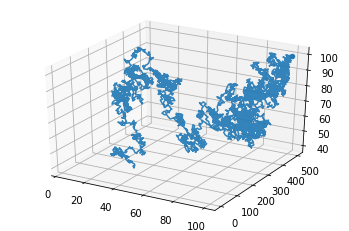

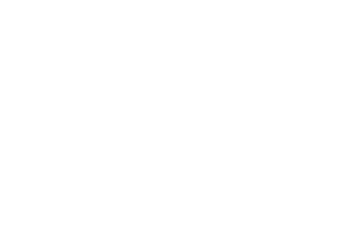

In [106]:
def bounded_random_walk(length, lower_bound,  upper_bound, start, end, std):
    assert (lower_bound <= start and lower_bound <= end)
    assert (start <= upper_bound and end <= upper_bound)

    bounds = upper_bound - lower_bound

    rand = (std * (np.random.random(length) - 0.5)).cumsum()
    rand_trend = np.linspace(rand[0], rand[-1], length)
    rand_deltas = (rand - rand_trend)
    rand_deltas /= np.max([1, (rand_deltas.max()-rand_deltas.min())/bounds])

    trend_line = np.linspace(start, end, length)
    upper_bound_delta = upper_bound - trend_line
    lower_bound_delta = lower_bound - trend_line

    upper_slips_mask = (rand_deltas-upper_bound_delta) >= 0
    upper_deltas =  rand_deltas - upper_bound_delta
    rand_deltas[upper_slips_mask] = (upper_bound_delta - upper_deltas)[upper_slips_mask]

    lower_slips_mask = (lower_bound_delta-rand_deltas) >= 0
    lower_deltas =  lower_bound_delta - rand_deltas
    rand_deltas[lower_slips_mask] = (lower_bound_delta + lower_deltas)[lower_slips_mask]

    return trend_line + rand_deltas

def CréaPoly():
  R=np.zeros([5000,3])
  R[:,0] = bounded_random_walk(5000, lower_bound=0, upper_bound =100, start=50, end=100, std=10)
  R[:,1] = bounded_random_walk(5000, lower_bound=0, upper_bound =500, start=0, end=500, std=10)
  R[:,2] = bounded_random_walk(5000, lower_bound=0, upper_bound =100, start=50, end=100, std=10)
  return(R)

R=CréaPoly()
ax = plt.subplot(1,1,1, projection='3d')
plt.figure()
plt.axis('off')
ax.plot(R[:,0], R[:,1], R[:,2],alpha=0.9) #alpha sets the darkness of the path.
ax.scatter(R[-1,0],R[-1,1],R[-1,2])
plt.show()
ax.view_init(50, 20)

Ici on crée le polymere en random walk mais en soit on aurait toujours des corrélations augulaires nulles car les sauts sont toujours de -1 ou +1 dans chaque direction à chaque pas, on regroupe donc la marche aléatoire sous forme de "génomes", qui sont ici des groupes d'un certains nombre de pas. Cf article cb on doit en prendre.


# **Part 2 : Regroupement sous forme de génomes**

In [76]:
B= 10

Ce nombre est le rapport du nombre de pas de marches aléatoires qui vont définir notre taille de génome (10 kb)

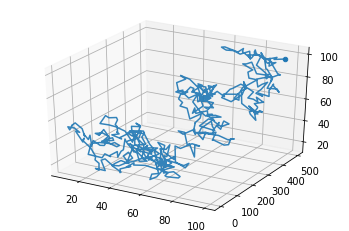

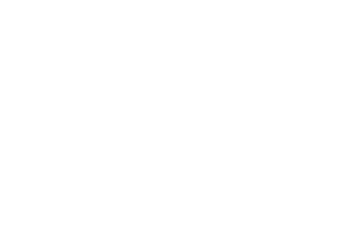

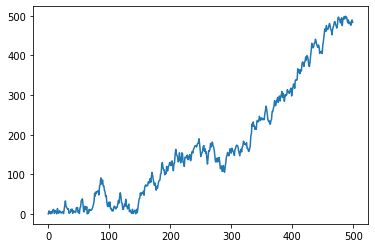

In [107]:

def Poly2Gen(Poly,B):
  PolyZip=np.zeros([int(len(Poly)/B),3])
  PolyZip[:,0]=Poly[:,0][::B]
  PolyZip[:,1]=Poly[:,1][::B]
  PolyZip[:,2]=Poly[:,2][::B]
  return(PolyZip)

def AffichagePoly(Poly):
  ax = plt.subplot(1,1,1, projection='3d')
  plt.figure()
  plt.axis('off')
  ax.plot(Poly[:,0],Poly[:,1], Poly[:,2],alpha=0.9) #alpha sets the darkness of the path.
  ax.scatter(Poly[-1,0],Poly[-1,1],Poly[-1,2])
  plt.show()
  ax.view_init(1000, 120)

C=CréaPoly()
AffichagePoly(Poly2Gen(C,B))
plt.plot(Poly2Gen(C,B)[:,1])

Notre polymère est maintenant sous forme de génome et on peut envisager de calculer des corrélations angulaires ect

# **Part 2 : Création d'une banque de données**

Pb : Mtn on doit créer pleins de polymères, c'est du Monte Carlo simulation. On crée pleins de polymères, et on appliquera par la suite un poids énergétique pour discuter du comportement de la distribution.

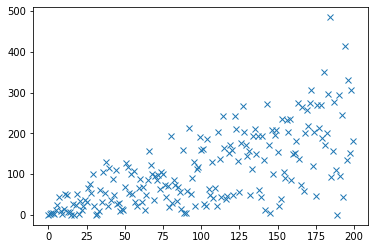

In [114]:
L=[]
B=10
for k in range(100000):
  L.append(Poly2Gen(CréaPoly(),B))

Zmean=[]
for k in range(200):
  C=[]
  for l in range(100000):
    Poly=L[k]
    C.append(Poly[k,1])
  Zmean.append(np.mean(C))
plt.plot(Zmean,'x')